In [14]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

Our accuracy score for this model is 0.9812734082397003


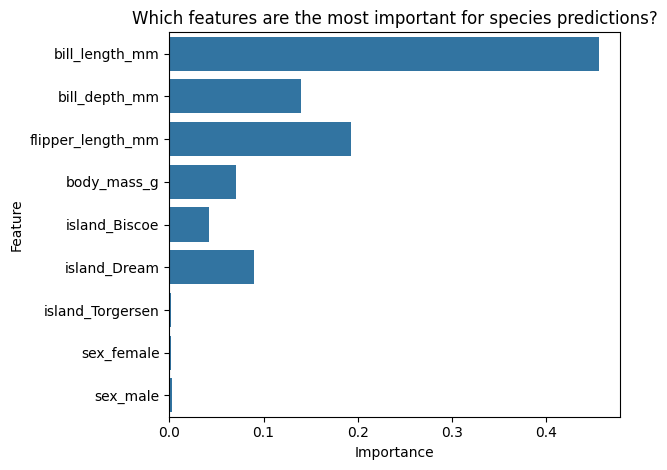

In [15]:
penguin_df= pd.read_csv('penguins.csv')
penguin_df.dropna(inplace= True)
output= penguin_df['species']
features= penguin_df[['island',
                      'bill_length_mm',
                      'bill_depth_mm',
                      'flipper_length_mm',
                      'body_mass_g',
                      'sex']]
features= pd.get_dummies(features)
output, uniques= pd.factorize(output)
x_train, x_test, y_train, y_test= train_test_split(
    features, output, test_size= 0.8
)
rfc= RandomForestClassifier(random_state= 15)
rfc.fit(x_train.values, y_train)
y_pred= rfc.predict(x_test.values)
score= accuracy_score(y_pred, y_test)
print('Our accuracy score for this model is {}'.format(score))

rf_pickle= open('random_forest_penguin.pickle', 'wb')
pickle.dump(rfc, rf_pickle)
rf_pickle.close()
output_pickle= open('output_penguin.pickle', 'wb')
pickle.dump(uniques, output_pickle)
output_pickle.close()

fig, ax= plt.subplots()
ax= sns.barplot(x= rfc.feature_importances_, y= features.columns)
plt.title('Which features are the most important for species predictions?')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
fig.savefig('feature_importance.png')